In [59]:
import pandas as pd
import datetime
import os
import numpy as np


import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sys

import plotly.express as px

# Задача 1
## Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

In [60]:
# Загружаем данные посещений сайта из CSV файла
website_visits_data_step_1= pd.read_csv('D:/курс_архив/my_files/lesson_7/step_1_lesson_7.csv')
website_visits_data_step_1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


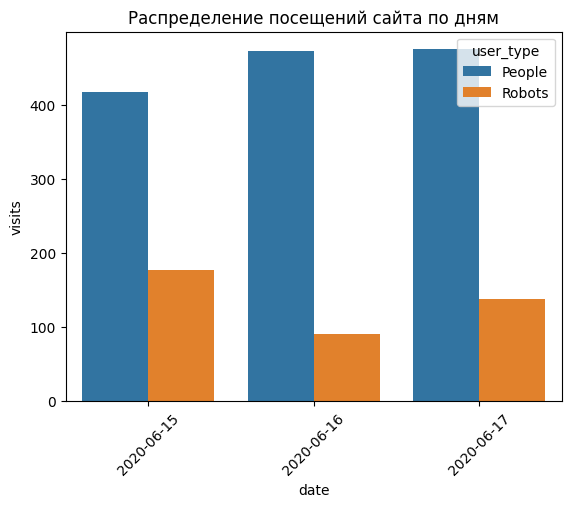

In [61]:
# Строим график с распределением количества посещений от ботов и обычных пользователей
# 'x' — это даты, 'y' — количество посещений, 'hue' — тип пользователя (боты или люди)
sns.barplot(x='date', y='visits', hue='user_type', data=website_visits_data_step_1)
# Настраиваем график, чтобы было удобнее интерпретировать данные
plt.title("Распределение посещений сайта по дням")
plt.xticks(rotation=45)  # Поворачиваем подписи оси x для лучшей читаемости
plt.show()

# Задача 2
## Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

### Ответ округлите до целого.

In [62]:
website_visits_data_step_2 = pd.read_csv('D:/курс_архив/my_files/lesson_7/step_2_lesson_7.csv')
website_visits_data_step_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [63]:
website_visits_data_step_2['percent_%'] = ((website_visits_data_step_2.visits / website_visits_data_step_2.visits.sum()) * 100).round()
website_visits_data_step_2

,date,browser,visits,percent_%
0,2020-06-15,Google Chrome,354.0,60.0
1,2020-06-15,Firefox,58.0,10.0
2,2020-06-15,Yandex Browser,54.0,9.0
3,2020-06-15,Safari,41.0,7.0
4,2020-06-15,Chrome Mobile,31.0,5.0
5,2020-06-15,Opera,16.0,3.0
6,2020-06-15,Mobile Safari,16.0,3.0
7,2020-06-15,Samsung Internet,9.0,2.0
8,2020-06-15,Edge,5.0,1.0
9,2020-06-15,UCWEB,4.0,1.0


# Задача 3
## Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

In [64]:
website_visits_data_step_3 = pd.read_csv('D:/курс_архив/my_files/lesson_7/step_3_lesson_7.csv')
website_visits_data_step_3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [65]:
# Группировка данных по браузеру для подсчета общего числа посещений с каждого браузера
# 'visits': 'sum' - суммируем количество посещений для каждого браузера
total_visits_per_browser = website_visits_data_step_3.groupby(['browser']) \
    .agg({'visits': 'sum'})

In [66]:
# Объединяем данные о посещениях с информацией по ботам для каждого браузера
# Объединение производится по столбцу 'browser', добавляя к общему числу посещений информацию о посещениях ботами
full_merged_df  = website_visits_data_step_3.merge(total_visits_per_browser, on='browser', how='inner')
full_merged_df # Просмотр объединенного датафрейма

,date,browser,user_type,visits_x,visits_y
0,2020-06-15,Google Chrome,People,250.0,354.0
1,2020-06-15,Google Chrome,Robots,104.0,354.0
2,2020-06-15,Yandex Browser,People,47.0,54.0
3,2020-06-15,Firefox,Robots,31.0,58.0
4,2020-06-15,Chrome Mobile,People,31.0,31.0
5,2020-06-15,Firefox,People,27.0,58.0
6,2020-06-15,Safari,Robots,22.0,41.0
7,2020-06-15,Safari,People,19.0,41.0
8,2020-06-15,Mobile Safari,People,15.0,16.0
9,2020-06-15,Opera,People,11.0,16.0


In [67]:
# Расчет процента посещений ботами для каждого браузера
# Формула: (посещения ботами / общее количество посещений) * 100
full_merged_df['percent'] = ((full_merged_df.visits_x / full_merged_df.visits_y) * 100).round(2)
full_merged_df.query('user_type == "Robots"') \
    .sort_values('percent', ascending=False)

,date,browser,user_type,visits_x,visits_y,percent
13,2020-06-15,UCWEB,Robots,4.0,4.0,100.00
6,2020-06-15,Safari,Robots,22.0,41.0,53.66
3,2020-06-15,Firefox,Robots,31.0,58.0,53.45
18,2020-06-15,Chromium,Robots,1.0,2.0,50.00
12,2020-06-15,Opera,Robots,5.0,16.0,31.25
1,2020-06-15,Google Chrome,Robots,104.0,354.0,29.38
21,2020-06-15,Edge,Robots,1.0,5.0,20.00
11,2020-06-15,Yandex Browser,Robots,7.0,54.0,12.96
23,2020-06-15,Samsung Internet,Robots,1.0,9.0,11.11
15,2020-06-15,Mobile Safari,Robots,1.0,16.0,6.25


# Ответ "UCWEB"

# Задача 4
## Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

### В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

In [68]:
# Загрузка данных по визитам на сайт, содержащих информацию о дне, браузере и типе пользователя
website_visits_data_step_4 = pd.read_csv('D:/курс_архив/my_files/lesson_7/step_4_lesson_7.csv')
website_visits_data_step_4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [69]:
# Группировка данных по дате, браузеру и типу пользователя с суммированием количества визитов
grouped_visits = website_visits_data_step_4.groupby(['date' ,'browser', 'user_type'], as_index=False) \
    .agg({'visits': 'sum'})
grouped_visits

,date,browser,user_type,visits
0,2020-06-15,Android Browser,People,1.0
1,2020-06-15,Chrome Mobile,People,31.0
2,2020-06-15,Chromium,People,1.0
3,2020-06-15,Chromium,Robots,1.0
4,2020-06-15,CocCoc,People,1.0
5,2020-06-15,Edge,People,4.0
6,2020-06-15,Edge,Robots,1.0
7,2020-06-15,Firefox,People,27.0
8,2020-06-15,Firefox,Robots,31.0
9,2020-06-15,Google Chrome,People,250.0


In [70]:
# Расчет доли визитов для каждого из разрезов
grouped_visits['visit_share_%'] = (grouped_visits.visits / grouped_visits.visits.sum() * 100).round(1)

In [71]:
# Фильтрация для нахождения процента визитов настоящих пользователей с браузера Safari
safari_people_visits = grouped_visits.query('browser == "Safari" and user_type == "People"')
safari_people_visits # Вывод результата

,date,browser,user_type,visits,visit_share_%
15,2020-06-15,Safari,People,19.0,3.2


# Ответ: процент открытий сайта настоящими пользователями Safari (не ботами) ровняется 3.2

# Задача 5
## Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

### В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [97]:
# Чтение данных, полученных в предыдущем шаге
step_4_df = pd.read_csv('D:/курс_архив/my_files/lesson_7/step4.csv')
step_4_df

,Unnamed: 0,date,browser,user_type,visits,percent
0,0,2020-06-15,Android Browser,People,1.0,0.2
1,1,2020-06-15,Chrome Mobile,People,31.0,5.2
2,2,2020-06-15,Chromium,People,1.0,0.2
3,3,2020-06-15,Chromium,Robots,1.0,0.2
4,4,2020-06-15,CocCoc,People,1.0,0.2
5,5,2020-06-15,Edge,People,4.0,0.7
6,6,2020-06-15,Edge,Robots,1.0,0.2
7,7,2020-06-15,Firefox,People,27.0,4.5
8,8,2020-06-15,Firefox,Robots,31.0,5.2
9,9,2020-06-15,Google Chrome,People,250.0,42.1


In [98]:
# Чтение данных другого аналитика из Google Spreadsheet
from io import BytesIO
import requests
# Загружаем данные через запрос
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
# Преобразуем ответ в байты и читаем как CSV-файл
data = r.content

df = pd.read_csv(BytesIO(data))

In [99]:
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [100]:
# Объединение данных с другого аналитика и вашей таблицы по дате, браузеру и типу пользователя
merged_df = step_4_df.merge(df, on=['date', 'browser', 'user_type'], how='inner')

In [101]:
merged_df

,Unnamed: 0,date,browser,user_type,visits,percent,users
0,0,2020-06-15,Android Browser,People,1.0,0.2,1.0
1,1,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0
2,2,2020-06-15,Chromium,People,1.0,0.2,1.0
3,3,2020-06-15,Chromium,Robots,1.0,0.2,1.0
4,4,2020-06-15,CocCoc,People,1.0,0.2,1.0
5,5,2020-06-15,Edge,People,4.0,0.7,4.0
6,6,2020-06-15,Edge,Robots,1.0,0.2,1.0
7,7,2020-06-15,Firefox,People,27.0,4.5,26.0
8,8,2020-06-15,Firefox,Robots,31.0,5.2,29.0
9,9,2020-06-15,Google Chrome,People,250.0,42.1,240.0


In [110]:
# Создаем новую колонку, где рассчитываем количество визитов на пользователя (отношение visits к users)
merged_df['visits_per_user'] = merged_df.visits / merged_df.users
merged_df

,Unnamed: 0,date,browser,user_type,visits,percent,users,new_column,visits_per_user
0,0,2020-06-15,Android Browser,People,1.0,0.2,1.0,1.000000,1.000000
1,1,2020-06-15,Chrome Mobile,People,31.0,5.2,30.0,1.033333,1.033333
2,2,2020-06-15,Chromium,People,1.0,0.2,1.0,1.000000,1.000000
3,3,2020-06-15,Chromium,Robots,1.0,0.2,1.0,1.000000,1.000000
4,4,2020-06-15,CocCoc,People,1.0,0.2,1.0,1.000000,1.000000
5,5,2020-06-15,Edge,People,4.0,0.7,4.0,1.000000,1.000000
6,6,2020-06-15,Edge,Robots,1.0,0.2,1.0,1.000000,1.000000
7,7,2020-06-15,Firefox,People,27.0,4.5,26.0,1.038462,1.038462
8,8,2020-06-15,Firefox,Robots,31.0,5.2,29.0,1.068966,1.068966
9,9,2020-06-15,Google Chrome,People,250.0,42.1,240.0,1.041667,1.041667


In [109]:
# Отфильтруем данные для браузера Google Chrome и типа пользователя Robots и округлим результат
chrome_robots_visits_per_user = merged_df.query('browser == "Google Chrome" and user_type == "Robots"').round(0)
chrome_robots_visits_per_user

,Unnamed: 0,date,browser,user_type,visits,percent,users,new_column,visits_per_user
10,10,2020-06-15,Google Chrome,Robots,104.0,18.0,104.0,1.0,1.0


# Ответ: 1